In [1]:
import pandas as pd
import seaborn as sns

# Lets us import sparse matrices
import scipy.io
import scipy.sparse
import csv


#from lets us import only a part of that package rather than the entire thing. 
#We only need the pyplot section of matplotlib so we are only importing that.
from matplotlib import pyplot as plt

#In order for plots to appear in the notebook we need this:
%matplotlib inline

In [2]:
data_dir = "/home/ucsd-train13/scratch/projects/organoids/results/13_DigitalExpression/"
#Take a look at the string stored in the data_dir variable
data_dir
#prints out data_dir because it is the last line in the cell

'/home/ucsd-train13/scratch/projects/organoids/results/13_DigitalExpression/'

In [3]:
#define function we are going to use later
def read_mtx_as_dataframe(mtx_file, columns_file, rows_file):
    """
    Reads a mtx file and returns a pandas dataframe.
    
    :param mtx_file: sparse matrix
    :param columns_file: tab-separated file containing column names
    :param rows_file: tab-separated file containing row names
    
    :return df: Pandas.DataFrame()
    """
    mat = scipy.io.mmread(mtx_file)
    columns = [
        row[0] for row in csv.reader(open(columns_file), delimiter="\t")
    ]
    rows = [
        row[0] for row in csv.reader(open(rows_file), delimiter="\t")
    ]
    df = pd.DataFrame(mat.todense(), columns=columns, index=rows)
    return df

In [4]:
counts_file = data_dir+"matrix_all.csv"
counts_file

'/home/ucsd-train13/scratch/projects/organoids/results/13_DigitalExpression/matrix_all.csv'

In [5]:
#Store the dataframe with the name raw_counts
raw_counts = pd.read_csv(data_dir+"matrix_all.csv", index_col=0)

#Print the size of the dataframe (number of rows and columns)
#look at the dimensions of the dataframe and show the first 5 rows
print(raw_counts.shape)
raw_counts.head()

(23049, 12000)


,FBWT2_CAGGCATCTCCG,FBWT2_TCACCAGTCTCG,FBWT2_CCCGAGTCATAC,FBWT2_CGCTTACGTCTT,FBWT2_TTCCATATAGCT,FBWT2_TCCCGACCATAA,FBWT2_TAGTGATTATCA,FBWT2_GCCTCCATCGTT,FBWT2_GTACGATCAAGC,FBWT2_TAAACGTCACGG,...,FBIVS2_CTGTGACTATTG,FBIVS2_GTAGAGGTCCCT,FBIVS2_TCAACAAATTCT,FBIVS2_TCCTACGAGAGC,FBIVS2_CGGGATCATCAA,FBIVS2_GCGATAATCTGG,FBIVS2_GATTATCTACTT,FBIVS2_GATTCAAACTTG,FBIVS2_TGCTGAATATTG,FBIVS2_AGTATATTTACT
GENE,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
genes_detected_per_cell = (raw_counts > 0).sum()
#makes true/false array and sums the non zero values for each row (= cell barcodes)
genes_detected_per_cell.head()

FBWT2_CAGGCATCTCCG    4111
FBWT2_TCACCAGTCTCG    4107
FBWT2_CCCGAGTCATAC    4253
FBWT2_CGCTTACGTCTT    4458
FBWT2_TTCCATATAGCT    4418
dtype: int64

In [7]:
#How many cells express at least this number of cells
print((genes_detected_per_cell > 1500).sum())
print((genes_detected_per_cell > 1000).sum())
print((genes_detected_per_cell > 800).sum())
(genes_detected_per_cell > 500).sum()

3229
5103
5882


7213

In [8]:
genes_detected_per_cell.min()
#the lowest detected gene number per cell is 0 genes. We overestimated the number of cells per sample
#during dropseqtools processing to not lose any cells. So now we have to filter.

0

In [9]:
#select cells to keep based on number of genes detected per cell:
cells_to_keep = genes_detected_per_cell > 800

In [10]:
counts_filtered_by_cell = raw_counts.T.loc[cells_to_keep].T
#switches rows and columns (because.loc operates on the index), subsets to cells to keep and switches rows and columns back
#.loc searches by the index. If true, it keeps it, if false it discards it
print(counts_filtered_by_cell.shape)
counts_filtered_by_cell.head()

(23049, 5882)


,FBWT2_CAGGCATCTCCG,FBWT2_TCACCAGTCTCG,FBWT2_CCCGAGTCATAC,FBWT2_CGCTTACGTCTT,FBWT2_TTCCATATAGCT,FBWT2_TCCCGACCATAA,FBWT2_TAGTGATTATCA,FBWT2_GCCTCCATCGTT,FBWT2_GTACGATCAAGC,FBWT2_TAAACGTCACGG,...,FBIVS2_CGTTCGAGACCC,FBIVS2_ATACGCTCCCCA,FBIVS2_AGTGGTTTGTGG,FBIVS2_TTCGGACCGGTC,FBIVS2_AATGCGGCAGTA,FBIVS2_TATAGTATAAAG,FBIVS2_CAACAGGGTTCG,FBIVS2_ACGGGTAGTCTA,FBIVS2_GGGCGCGGTCTG,FBIVS2_AGGCATTATCCT
GENE,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
A1BG-AS1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#caluculate total number of cells
num_cells = len(counts_filtered_by_cell.columns)
num_cells

5882

In [12]:
#filter out genes that are expressed in less than x% of the cells
#again be careful about what treshold you set for your experiment
genes_to_keep_1p = (counts_filtered_by_cell > 0).sum(axis=1) > 0.01*num_cells
genes_to_keep_5p = (counts_filtered_by_cell > 0).sum(axis=1) > 0.05*num_cells
genes_to_keep_10p = (counts_filtered_by_cell > 0).sum(axis=1) > 0.1*num_cells

print(genes_to_keep_1p.sum())
print(genes_to_keep_5p.sum())
genes_to_keep_10p.sum()

12213
7567


4965

In [13]:
counts_filt_by_cell_and_genes = counts_filtered_by_cell.loc[genes_to_keep_1p]
print(counts_filt_by_cell_and_genes.shape)
counts_filt_by_cell_and_genes.head()

(12213, 5882)


,FBWT2_CAGGCATCTCCG,FBWT2_TCACCAGTCTCG,FBWT2_CCCGAGTCATAC,FBWT2_CGCTTACGTCTT,FBWT2_TTCCATATAGCT,FBWT2_TCCCGACCATAA,FBWT2_TAGTGATTATCA,FBWT2_GCCTCCATCGTT,FBWT2_GTACGATCAAGC,FBWT2_TAAACGTCACGG,...,FBIVS2_CGTTCGAGACCC,FBIVS2_ATACGCTCCCCA,FBIVS2_AGTGGTTTGTGG,FBIVS2_TTCGGACCGGTC,FBIVS2_AATGCGGCAGTA,FBIVS2_TATAGTATAAAG,FBIVS2_CAACAGGGTTCG,FBIVS2_ACGGGTAGTCTA,FBIVS2_GGGCGCGGTCTG,FBIVS2_AGGCATTATCCT
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
A1BG-AS1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACS,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AADAT,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
save_dir = "/home/ucsd-train13/scratch/projects/organoids/results/processed_files/"
counts_filt_by_cell_and_genes.to_csv(save_dir+"counts_filt_800genes_5882cells.csv")

(0, 25000)

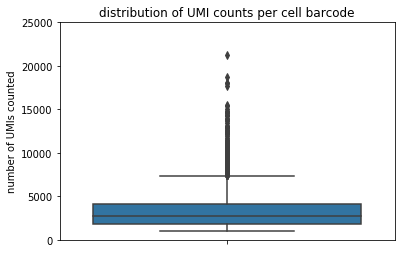

In [15]:
sns.boxplot(counts_filt_by_cell_and_genes.sum().values, orient = 'v')
plt.ylabel("number of UMIs counted")
plt.title("distribution of UMI counts per cell barcode")
plt.ylim([0,25000])
#boxplot

In [21]:
#calculate mean number of UMIs per cell
num_cells_filtered = len(counts_filt_by_cell_and_genes.columns)
num_cells_filtered

5882

In [26]:
UMIs_per_cell_filtered = counts_filt_by_cell_and_genes.sum(axis=0).mean()
UMIs_per_cell_filtered

3258.722543352601

(0, 25000)

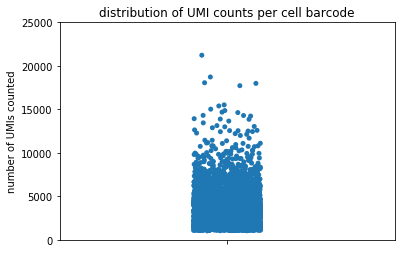

In [16]:
sns.stripplot(counts_filt_by_cell_and_genes.sum().values, orient = 'v', jitter=True)
plt.ylabel("number of UMIs counted")
plt.title("distribution of UMI counts per cell barcode")
plt.ylim([0,25000])
#jitterplot

(0, 25000)

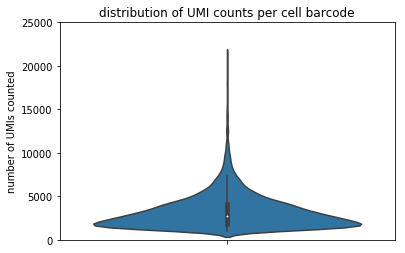

In [19]:
sns.violinplot(counts_filt_by_cell_and_genes.sum(axis=0), orient='v')
plt.ylabel("number of UMIs counted")
plt.title ("distribution of UMI counts per cell barcode")
plt.ylim([0,25000])

(0, 10000)

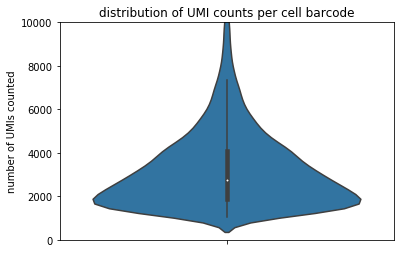

In [27]:
sns.violinplot(counts_filt_by_cell_and_genes.sum(axis=0), orient='v')
plt.ylabel("number of UMIs counted")
plt.title ("distribution of UMI counts per cell barcode")
plt.ylim([0,10000])